In [1]:
from pathlib import Path
import imageio as iio
import numpy as np
import cv2
import toml
import json
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
session_names = ["air_only_exposure_18000","white_1_elevated_360_9000_clahe",
                "cyl1_exposure30000_360frames_flat","2_clahe_notflat",
                "Eric_charuco_for_lin","images_online125imgs"]
sessions_path = "images"
data_path = "calibration_data"
board_path = "board.toml"


In [3]:
with open(board_path, "r") as f:
    board = toml.load(f)
    
board

{'board_x': 8,
 'board_y': 11,
 'square_length': 24.0,
 'marker_length': 18.75,
 'marker_bits': 4,
 'dict_size': 1000}

images_online125imgs


C:\Users\linwang\AppData\Local\Temp\ipykernel_41172\2264765679.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imgs = np.stack([iio.imread(Path(sessions_path) / session / f"{view}.png") for view in views], axis=0)[:,:,:,0]


(125, 480, 640) uint8
(125, 480, 640) uint8


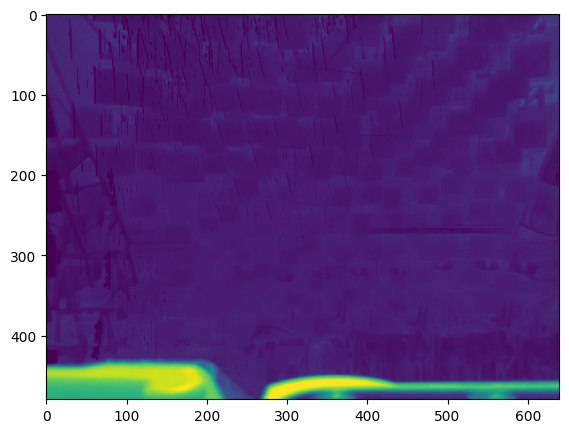

In [5]:
# v = 1
# view = views[v]
# imgs = np.stack([iio.imread(Path(sessions_path) / session / f"{view}.png") for session in session_names], axis=0)

s = 5
session = session_names[s]
print(session)

n_imgs = len(os.listdir(os.path.join(sessions_path,session)))
views = [str(i) for i in range(1, n_imgs + 1)]

#n_imgs = 34
#views = [str(i+29) for i in range(1, n_imgs + 1)]
#print(views)

imgs = np.stack([iio.imread(Path(sessions_path) / session / f"{view}.png") for view in views], axis=0)[:,:,:,0]
print(imgs.shape, imgs.dtype)

# imgs = imgs[:, crop_bbox[0]:crop_bbox[1], crop_bbox[2]:crop_bbox[3]]

plt.figure(figsize=(8, 5))
plt.imshow(imgs.min(axis=0))

print(imgs.shape, imgs.dtype)
_, img_height, img_width = imgs.shape

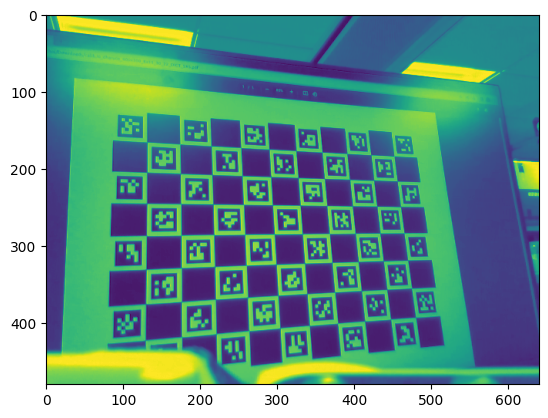

In [6]:
plt.imshow(imgs[0])

In [7]:
def calibrate_camera_with_charuco(images, squaresX, squaresY, squareLength, markerLength):
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((squaresX*squaresY,3), np.float32)
    objp[:,:2] = np.mgrid[0:squaresX,0:squaresY].T.reshape(-1,2)

    # create charuco board
    aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_1000)
    board = cv2.aruco.CharucoBoard((squaresX, squaresY), squareLength, markerLength, aruco_dict)
    
    # arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.

    # loop over all image paths
    for img in images:
        gray = img

        # find aruco markers
        corners, ids, _ = cv2.aruco.detectMarkers(gray, aruco_dict)
        if len(corners) == 0:
            continue
        # print(len(corners), len(ids))

        # if len(corners) > 0:
        # interpolate charuco corners
        _, charuco_corners, charuco_ids = cv2.aruco.interpolateCornersCharuco(corners, ids, gray, board)
        # print(charuco_corners)
        
        
        
        if charuco_corners is not None:
            print(f"Detected {len(charuco_corners)}/{len(charuco_ids)}")

        if charuco_corners is not None and charuco_ids is not None and len(charuco_corners) > 6 and len(charuco_ids) > 6:
            # store object points and image points
            objp_ = objp[charuco_ids]
            # print(objp_.shape, charuco_corners.shape)
            objpoints.append(objp_)
            imgpoints.append(charuco_corners)

    # calibrate camera
    # print(objpoints, imgpoints, gray.shape)
    print(f"Total: {len(objpoints)}/{len(imgpoints)}")
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None, flags=(cv2.CALIB_FIX_ASPECT_RATIO + cv2.CALIB_FIX_FOCAL_LENGTH + cv2.CALIB_SAME_FOCAL_LENGTH + cv2.CALIB_ZERO_TANGENT_DIST))

    return ret, mtx, dist, rvecs, tvecs, objpoints, imgpoints




In [ ]:
# ret, mtx, dist, rvecs, tvecs, objpoints, imgpoints =  calibrate_camera_with_charuco(imgs, board["board_x"], board["board_y"], board["square_length"], board["marker_length"])
ret, mtx, dist, rvecs, tvecs, objpoints, imgpoints =  calibrate_camera_with_charuco(imgs, 8, 11, 48/11, 18.75*48/11/24)


Detected 44/44
Detected 31/31
Detected 38/38
Detected 32/32
Detected 30/30
Detected 15/15
Detected 33/33
Detected 29/29
Detected 29/29
Detected 19/19
Detected 27/27
Detected 24/24
Detected 26/26
Detected 24/24
Detected 23/23
Detected 31/31
Detected 21/21
Detected 19/19
Detected 14/14
Detected 11/11
Detected 21/21
Detected 14/14
Detected 31/31
Detected 18/18
Detected 21/21
Detected 11/11
Detected 12/12
Detected 12/12
Detected 11/11
Detected 17/17
Detected 21/21
Detected 17/17
Detected 14/14
Detected 27/27
Detected 14/14
Detected 12/12
Detected 15/15
Detected 12/12
Detected 3/3
Detected 2/2
Detected 8/8
Detected 8/8
Detected 2/2
Detected 1/1
Detected 2/2
Detected 1/1
Detected 2/2
Detected 2/2
Detected 1/1
Detected 1/1
Detected 1/1
Detected 2/2
Detected 2/2
Detected 7/7
Detected 16/16
Detected 12/12
Detected 10/10
Detected 18/18
Detected 19/19
Detected 19/19
Detected 34/34
Detected 20/20
Detected 20/20
Detected 13/13
Detected 34/34
Detected 32/32
Detected 41/41
Detected 20/20
Detected 23/

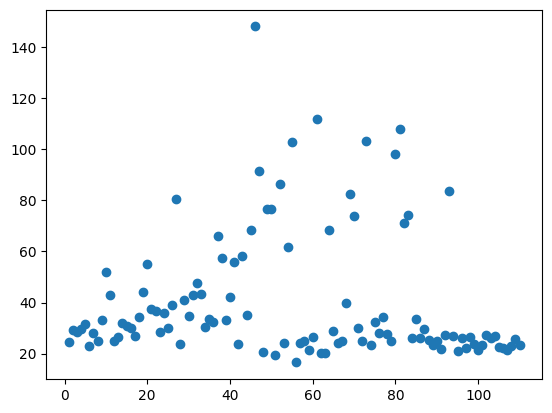

In [8]:
def error_evaluation(objpoints, rvecs, tvecs, mtx, dist):
    error_df = pd.DataFrame({'error':[0]})
    for i in range(len(objpoints)):
        # Project object points to image plane
        reprojectedPoints, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
        #print(len(reprojectedPoints))
        
        img_points = imgpoints
        error = cv2.norm(img_points[i], reprojectedPoints, cv2.NORM_L2) / len(reprojectedPoints)
        new_data = pd.DataFrame({'error':[error]})
        error_df = pd.concat([error_df, new_data], ignore_index=True)
    return error_df
    
error_df = error_evaluation(objpoints, rvecs, tvecs, mtx, dist)[1:]
#error_df
plt.scatter(error_df.index, error_df['error'])

In [50]:
intrinsics_path = "instrinsics_0717_empty_106frames_v02.json"
transforms = {
    "fl_x": mtx[0, 0],
    "fl_y": mtx[1, 1],
    "cx": mtx[0, 2],
    "cy": mtx[1, 2],
    "w": img_width,
    "h": img_height,
    "camera_model": "OPENCV",
    "k1": dist[0, 0],
    "k2": dist[0, 1],
    "p1": dist[0, 2],
    "p2": dist[0, 3],
}

#intrinsics_path = f"instrinsics_v{s}_{frame}.json"
#with open(intrinsics_path, "w") as f:
#    json.dump(transforms, f, indent=4)

# calibration based on individual image

In [9]:
squaresX, squaresY, squareLength, markerLength = 8, 11, 48/11, 18.75*48/11/24

In [10]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((squaresX*squaresY,3), np.float32)
objp[:,:2] = np.mgrid[0:squaresX,0:squaresY].T.reshape(-1,2)

# create charuco board
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_1000)
board = cv2.aruco.CharucoBoard((squaresX, squaresY), squareLength, markerLength, aruco_dict)

# arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.


In [11]:
frame = 0
img = imgs[frame]
gray = img

In [12]:
# find aruco markers
corners, ids, _ = cv2.aruco.detectMarkers(gray, aruco_dict)
print(len(corners), len(ids))

# interpolate charuco corners
_, charuco_corners, charuco_ids = cv2.aruco.interpolateCornersCharuco(corners, ids, gray, board)


if charuco_corners is not None:
    print(f"Detected {len(charuco_corners)}/{len(charuco_ids)}")

    
if charuco_corners is not None and charuco_ids is not None and len(charuco_corners) > 3 and len(charuco_ids) > 3:
    # store object points and image points
    objp_ = objp[charuco_ids]
    # print(objp_.shape, charuco_corners.shape)
    objpoints.append(objp_)
    imgpoints.append(charuco_corners)

print(f"Total: {len(objpoints)}/{len(imgpoints)}")
#ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

33 33
Detected 44/44
Total: 1/1


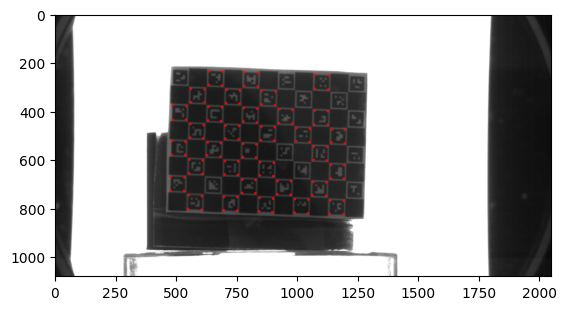

In [13]:
image3 = np.dstack((gray, gray, gray))
for corner in corners:
    loc = corner[0]
    for point in loc:
        x,y = point
        cv2.circle(image3, (int(x), int(y)), radius=5, color=(255,0,0), thickness=-1)  # Draw a filled circle around the point
plt.imshow(image3)

In [14]:
intrinsics_path = "instrinsics_0717_empty_frame30_v01.json"
transforms = {
    "fl_x": mtx[0, 0],
    "fl_y": mtx[1, 1],
    "cx": mtx[0, 2],
    "cy": mtx[1, 2],
    "w": img_width,
    "h": img_height,
    "camera_model": "OPENCV",
    "k1": dist[0, 0],
    "k2": dist[0, 1],
    "p1": dist[0, 2],
    "p2": dist[0, 3],
}

#intrinsics_path = f"instrinsics_v{s}_{frame}.json"
#with open(intrinsics_path, "w") as f:
#    json.dump(transforms, f, indent=4)

In [18]:
mtx, dist

(array([[164.98456414,   0.        , 996.69260284],
        [  0.        , 164.98456414, 541.14527252],
        [  0.        ,   0.        ,   1.        ]]),
 array([[-2.25661383e-02, -1.16872153e-05, -8.78325582e-04,
         -4.40992275e-02,  5.65564676e-07]]))

In [15]:
for i in range(len(objpoints)):
    # Project object points to image plane
    reprojectedPoints, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)

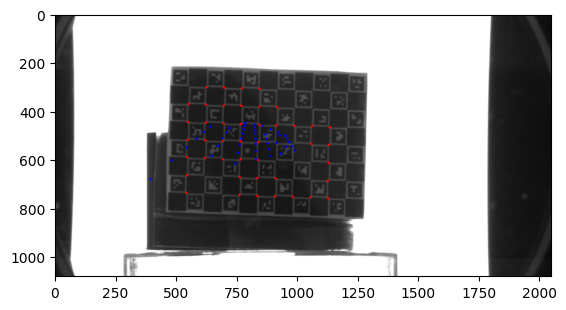

In [16]:
# Add points to the image and draw circles

# draw the paired points in original image
image3 = np.dstack((gray, gray, gray))
for point in imgpoints[0]:
    x,y = point[0]
    cv2.circle(image3, (int(x), int(y)), radius=5, color=(255,0,0), thickness=-1)  # Draw a filled circle around the point
    
# draw the paired points in reprojection image
# dst3 = np.dstack((dst, dst, dst))
for point in reprojectedPoints:
    x,y = point[0]
    cv2.circle(image3, (int(x), int(y)), radius=5, color=(0,0,255), thickness=-1)  # Draw a filled circle around the point
plt.imshow(image3)

In [38]:

h, w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

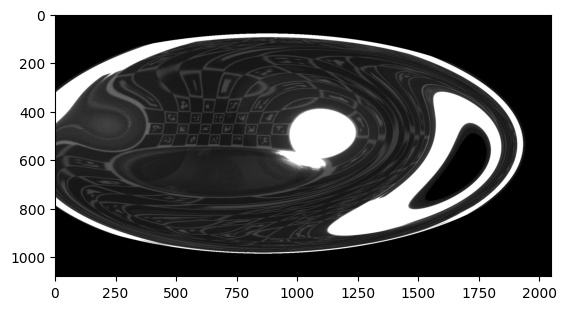

In [40]:
# Undistort an image
image3_o = np.dstack((gray, gray, gray))
dst = cv2.undistort(image3_o, mtx, dist, None, newCameraMatrix=newcameramtx)
plt.imshow(dst,cmap='gray')